# Running a dummy model

This notebook is a near replica of our [Colab notebook](https://colab.research.google.com/drive/1QeXglfCUEcscHB6L0Gch2qDKDDlfwLlq?usp=sharing#scrollTo=qYkGWADDxdlL) which demonstrates the same thing. 

This is the official repository for [EvalRS @ KDD 2023](https://reclist.io/kdd2023-cup/): _a Well-Rounded Evaluation of Recommender Systems_.

During KDD 2023 we will host a pizza hackathon night, where participants will pursue innovative projects for the rounded evaluation of recommender systems. The aim of the hackathon is to evaluate recommender systems across a set of important dimensions (accuracy being _one_ of them) through a principled and re-usable sets of abstractions, as provided by [RecList](https://github.com/jacopotagliabue/reclist) 🚀.

Organizers will provide in advance an open dataset and tools to help the teams, and award monetary prizes for the best projects. Everything will go back to the community as open source contributions!

This is a basic notebook that should get you up to speed on how to write code and models for EvalRS2023. We suggest running this notebook using either venv or conda to manage your python dependencies. This notebook makes the following assumptions:

- unix-like 
- write access to your `$HOME` dir
- Jupyter kernel running correctly. See [this guide on Jupyter + virtual environments for setup](https://janakiev.com/blog/jupyter-virtual-envs/).


The first cell is a setup cell that will clone the reclist repo localling and install it into your environment.

In [2]:
%%capture
!pip install -r ../requirements.txt

The following cell ensures that we add the `evalRS-KDD-2023` repo to the working path so our kernel can load it correctly and loads the rest of our dependencies. 

In [9]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('../evaluation'))

from EvalRSRunner import ChallengeDataset
from EvalRSReclist import EvalRSReclist
from reclist.reclist import LOGGER, METADATA_STORE
from gensim.models import KeyedVectors

In [4]:
# will automatically load it if it finds a cached copy locally.
dataset = ChallengeDataset()

LFM dataset already downloaded. Skipping download.
Loading dataset.
Generating Train/Test Split.
Generating dataset hashes.


Our basic class wrapper that shows how to define `predict`.

In [5]:
class EvalRSSimpleModel(object):
    """
    This is a dummy model that returns random predictions on the EvalRS dataset.
    """
    def __init__(self, items: pd.DataFrame, top_k: int=10, **kwargs):
        self.items = items
        self.top_k = top_k
        print("Received additional arguments: {}".format(kwargs))

    def predict(self, user_ids: pd.DataFrame) -> pd.DataFrame:
        k = self.top_k
        num_users = len(user_ids)
        pred = self.items.sample(n=k*num_users, replace=True).index.values
        pred = pred.reshape(num_users, k)
        pred = np.concatenate((user_ids[['user_id']].values, pred), axis=1)
        return pd.DataFrame(pred, columns=['user_id', *[str(i) for i in range(k)]]).set_index('user_id')

In [6]:
# dummy model
my_df_model = EvalRSSimpleModel(dataset.df_tracks, top_k=100)
# get some predictions
df_predictions = my_df_model.predict(dataset._get_test_set(fold=0)[['user_id']])

Received additional arguments: {}


In [7]:
df_predictions

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
384,198000,754119,10598212,355279,1866283,78076,387469,1354583,2862239,12644544,...,1719490,943559,29466059,4967405,49229,357539,1326928,1326335,1687202,1109201
10879,29902653,23874263,2768182,965782,749644,1137,636925,274213,22288,3110301,...,849154,210093,906704,1941810,700639,1893449,5093612,2003772,1338348,308840
12619,2252537,68689,29447096,2260030,1097413,517331,1570855,2218035,1560396,1732711,...,850263,5724297,105302,361269,29480927,1280898,16165567,2075231,869217,377631
14308,1537446,812283,247120,2505661,79247,638316,5953035,3013151,108943,3952322,...,983227,3206738,116182,89244,6153029,17971,693232,243043,94025,2519193
15067,556202,2377963,127245,2789503,143499,1087067,608076,2235970,16419726,667803,...,242814,1166618,7227918,196793,3994780,1053227,852828,532353,96884,16932649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50083088,4425739,1088888,2392808,464351,713791,1562437,3386378,1497351,285197,10878364,...,95157,88622,207206,813290,967621,1847086,284937,304503,1465106,208220
50085736,2822539,553483,331804,48123,16590724,860736,3259944,3689627,978907,119575,...,1916808,1496924,1359517,4599329,1785737,358854,494452,3486730,423873,901307
50086315,3039814,1038228,995048,674686,1567321,201440,29462384,15969,2735244,358147,...,1767371,521884,1271383,589257,6705255,737399,1131133,1420804,502063,3054652


Output()

stats:{'num_users': 29722, 'max_items': 1, 'min_items': 1}

HIT_RATE:3.364511136531862e-05

MRR:4.258874856369445e-07

MRED_USER_ACTIVITY:{'mred': -2.549544725512683e-05, 'mr': 0.9999663548886347, 1: 1.0, 100: 0.9999571587695999, 
1000: 1.0}

MRED_TRACK_POPULARITY:{'mred': -3.683536387988351e-05, 'mr': 0.9999663548886347, 1: 1.0, 10: 1.0, 100: 
0.999919948767211, 1000: 1.0}

MRED_ARTIST_POPULARITY:{'mred': -4.1421591400442326e-05, 'mr': 0.9999663548886347, 1: 1.0, 100: 1.0, 1000: 1.0, 
10000: 0.9999016038571288}

MRED_GENDER:{'mred': -9.710355382708258e-05, 'mr': 0.9999663548886347, 'f': 0.999742334449884, 'm': 1.0, 'n': 1.0}

BEING_LESS_WRONG:0.002226819982752204

                                 EvalRSReclist                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                   Type ┃ Description  ┃                               Result ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                  stats │              │                                    { │
│                        │              │                  "num_users": 29722, │
│                        │              │                      "max_items": 1, │
│                        │              │                       "min_items": 1 │
│                        │              │                                    } │
│               HIT_RATE │              │                                  0.0 │
│                    MRR │              │                                  0.0 │
│           MRED_COUNTRY │              │                                    { │
│                        │              │      "mred": -6.021999365231544e-05, │
│                        │              │             "mr": 0.999961993082741, │
│                        │              │                           "BR": 1.0, │
│                        │              │                           "CA": 1.0, │
│                        │              │                           "DE": 1.0, │
│                        │              │                           "ES": 1.0, │
│                        │              │                           "FI": 1.0, │
│                        │              │                           "FR": 1.0, │
│                        │              │                           "NL": 1.0, │
│                        │              │                          "NaN": 1.0, │
│                        │              │                           "PL": 1.0, │
│                        │              │                           "RU": 1.0, │
│                        │              │                           "SE": 1.0, │
│                        │              │                           "UA": 1.0, │
│                        │              │                           "UK": 1.0, │
│                        │              │             "US": 0.9996130030959752 │
│                        │              │                                    } │
│     MRED_USER_ACTIVITY │              │                                    { │
│                        │              │      "mred": -2.549544725512683e-05, │
│                        │              │            "mr": 0.9999663548886347, │
│                        │              │                            "1": 1.0, │
│                        │              │           "100": 0.9999571587695999, │
│                        │              │                          "1000": 1.0 │
│                        │              │                                    } │
│  MRED_TRACK_POPULARITY │              │                                    { │
│                        │              │      "mred": -3.683536387988351e-05, │
│                        │              │            "mr": 0.9999663548886347, │
│                        │              │                            "1": 1.0, │
│                        │              │                           "10": 1.0, │
│                        │              │            "100": 0.999919948767211, │
│                        │              │                          "1000": 1.0 │
│                        │              │                                    } │
│ MRED_ARTIST_POPULARITY │              │                                    { │
│                        │              │     "mred": -4.1421591400442326e-05, │
│                        │              │            "mr": 0.9999663548886347, │
│                        │              │                            "1": 1.0, │
│                        │              │                          "100": 1.0, │
│                        │     

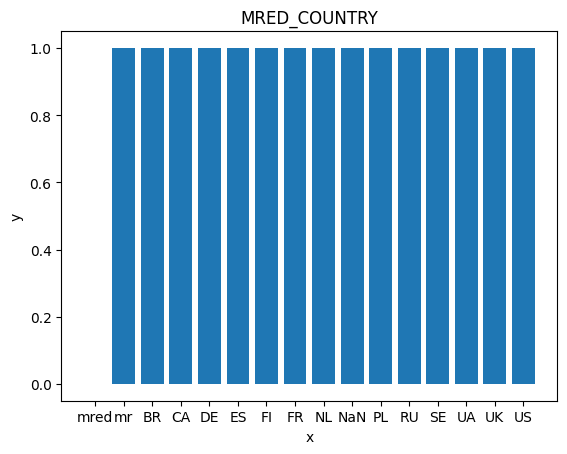

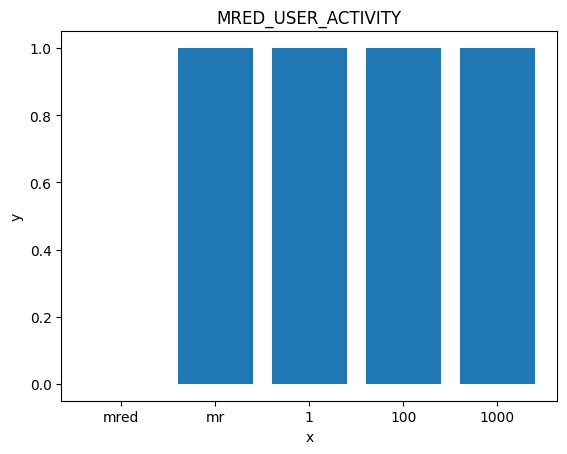

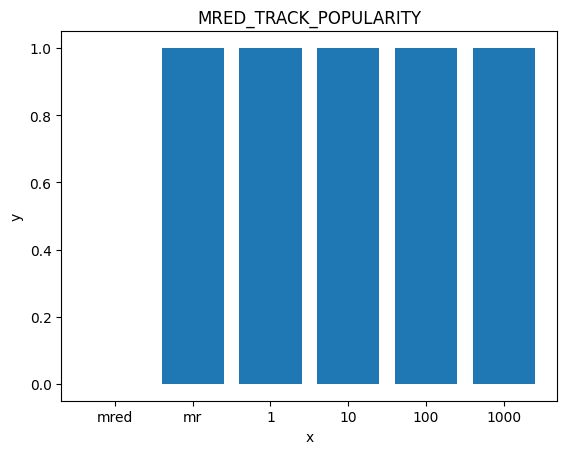

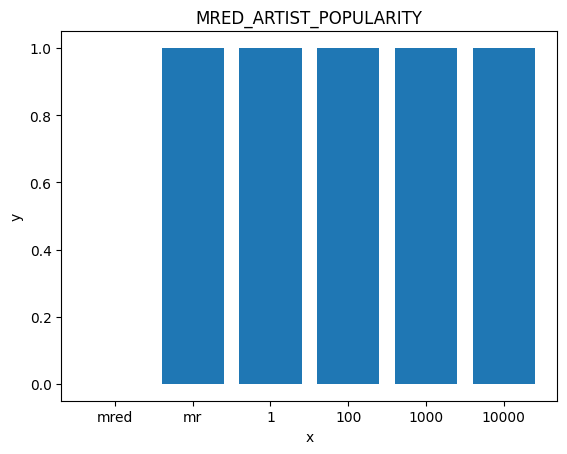

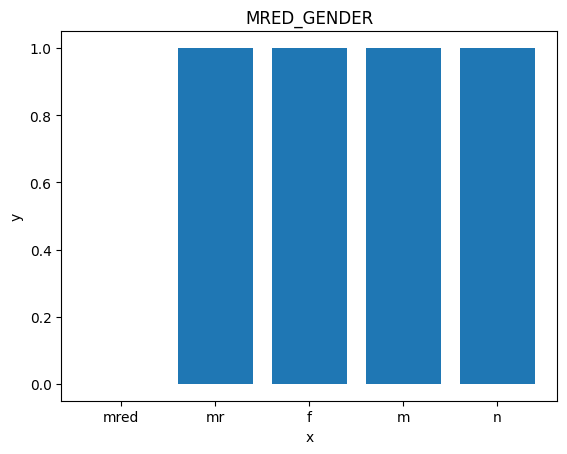

In [10]:
# load a similarity model: here we used
similarity_model = KeyedVectors.load(os.path.join(dataset.path_to_dataset, 'song2vec.wv'))

# initialize with everything
cdf = EvalRSReclist(
    dataset=dataset,
    model_name="SimpleModel",
    predictions=df_predictions,
    logger=LOGGER.LOCAL,
    metadata_store=METADATA_STORE.LOCAL,
    similarity_model=similarity_model,
)

# run reclist
cdf(verbose=True)